# Prudential Insurance Data Analysis - Kaggle Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing, metrics
from sklearn.datasets import make_blobs
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA

from sklearn.ensemble import  ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

import seaborn as sns
from mlxtend.plotting import category_scatter
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import graphviz
from sklearn.tree import export_graphviz 

In [2]:
### Allows expansion of dataframe if required.
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
#Create base dataframe from kaggle data file. R
df_base = pd.read_csv('train.csv', sep =',')

#Create dataframe for future EDA.

In [3]:
#Reference database without need to reload data, in case of inadverent mistakes.
#Create dataframe for future EDA.
df = df_base

In [4]:
#Review first 10 records
df.head(10)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8
5,10,1,D2,26,0.230769,3,1,1,0.507463,0.836364,...,0,0,0,0,0,0,0,0,0,8
6,11,1,A8,10,0.166194,2,3,1,0.373134,0.581818,...,0,0,0,0,0,0,0,0,0,8
7,14,1,D2,26,0.076923,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,1
8,15,1,D3,26,0.230769,2,3,1,0.522388,0.618182,...,0,0,0,0,0,0,0,0,0,8
9,16,1,E1,21,0.076923,2,3,1,0.552239,0.600000,...,0,0,0,0,0,0,0,0,0,1


In [4]:
#Review last 10 records
df.tail(10)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
59371,79137,1,D3,26,0.487179,2,1,1,0.537313,0.709091,...,0,0,0,0,0,0,0,0,0,6
59372,79138,1,D3,26,0.487179,2,3,1,0.477612,0.763636,...,0,0,1,0,0,0,0,0,1,2
59373,79139,2,D4,29,0.487179,2,3,1,0.208955,0.800000,...,0,0,0,0,0,0,0,0,0,8
59374,79140,1,D4,26,0.307692,2,3,1,0.164179,0.690909,...,0,0,0,0,0,0,0,0,0,7
59375,79141,1,C1,26,0.076923,2,3,1,0.477612,0.654545,...,0,0,0,0,0,0,0,0,0,8
59376,79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,...,0,0,0,0,0,0,0,0,0,4
59377,79143,1,D3,26,0.230769,2,3,1,0.432836,0.800000,...,0,0,0,0,0,0,0,0,0,7
59378,79144,1,E1,26,0.076923,2,3,1,0.104478,0.745455,...,0,0,0,0,0,0,0,0,0,8
59379,79145,1,D2,10,0.230769,2,3,1,0.507463,0.690909,...,1,0,0,0,0,0,0,0,0,8
59380,79146,1,A8,26,0.076923,2,3,1,0.447761,0.781818,...,0,0,0,0,0,0,0,0,0,7


In [7]:
#Assess the target variable count/distributon
df['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

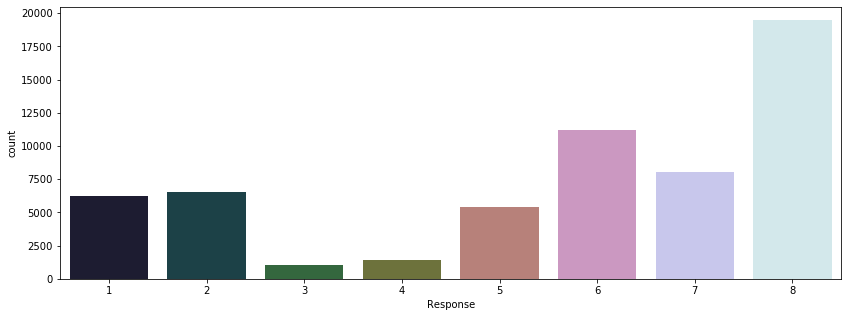

In [35]:
# Visualize the Class counts using Seaborn countplot

import seaborn as sns
plt.rcParams['figure.figsize'] = (14.0,5.0)
sns.countplot(x='Response',data=df,palette="cubehelix", order = range(1,9));

The above graph shows that the class 8 has most data where class 3 has least data. This shows an imbalance in our target variable, which suggests caution when performing k-fold cross-validation (Stratified).

There are several approaches to deal with imbalance data. Later on we will apply SMOTE which is an commonly used oversampling method.

## Data cleaning & Exploratory Data Analysis

1. <b>Descriptive statistics</b> include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


dtypes: float64(18), int64(109), object(1) 

Note: We will address dtype 'object' feature later on.

In [119]:
df.describe() #looking at statistics for the non-categorical variables.

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,557.000000,59381.000000,59381.000000,59381.000000,59381.000000,14785.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,3801.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,1107.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582

2. Handling features which have <b> missing values </b> (NaN).

In [5]:
# Count the number of missing values in each of the Features

total = df['Id'].count() #Create total count of records
print("Feature  \t\t Nan Count   \t Pct")
for i,c in df_base.T.iterrows():
        
    count = sum(c.isnull())
    if count >0:                        
        print("%s   \t%5d   \t%.2f%%"  %(i, count, (count/total)*100))

Feature  		 Nan Count   	 Pct
Employment_Info_1   	   19   	0.03%
Employment_Info_4   	 6779   	11.42%
Employment_Info_6   	10854   	18.28%
Insurance_History_5   	25396   	42.77%
Family_Hist_2   	28656   	48.26%
Family_Hist_3   	34241   	57.66%
Family_Hist_4   	19184   	32.31%
Family_Hist_5   	41811   	70.41%
Medical_History_1   	 8889   	14.97%
Medical_History_10   	58824   	99.06%
Medical_History_15   	44596   	75.10%
Medical_History_24   	55580   	93.60%
Medical_History_32   	58274   	98.14%


Before we can deal with these NaNs, we need to consider the statistical distributions of the various features.

In [8]:
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, 
# excluding NaN values.
df_nan = df[[
'Employment_Info_1',
'Employment_Info_4',
'Employment_Info_6',
'Insurance_History_5',
'Family_Hist_2',
'Family_Hist_3',
'Family_Hist_4',
'Family_Hist_5',
'Medical_History_1',
'Medical_History_10',
'Medical_History_15',
'Medical_History_24',
'Medical_History_32'    
]]

df_nan.describe()

,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_10,Medical_History_15,Medical_History_24,Medical_History_32
count,59362.000000,52602.000000,48527.000000,33985.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,557.000000,14785.000000,3801.000000,1107.000000
mean,0.077582,0.006283,0.361469,0.001733,0.474550,0.497737,0.444890,0.484635,7.962172,141.118492,123.760974,50.635622,11.965673
std,0.082347,0.032816,0.349551,0.007338,0.154959,0.140187,0.163012,0.129200,13.027697,107.759559,98.516206,78.149069,38.718774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.035000,0.000000,0.060000,0.000400,0.362319,0.401961,0.323944,0.401786,2.000000,8.000000,17.000000,1.000000,0.000000
50%,0.060000,0.000000,0.250000,0.000973,0.463768,0.519608,0.422535,0.508929,4.000000,229.000000,117.000000,8.000000,0.000000
75%,0.100000,0.000000,0.550000,0.002000,0.579710,0.598039,0.563380,0.580357,9.000000,240.000000,240.000000,64.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.943662,1.000000,240.000000,240.000000,240.000000,240.000000,240.000000


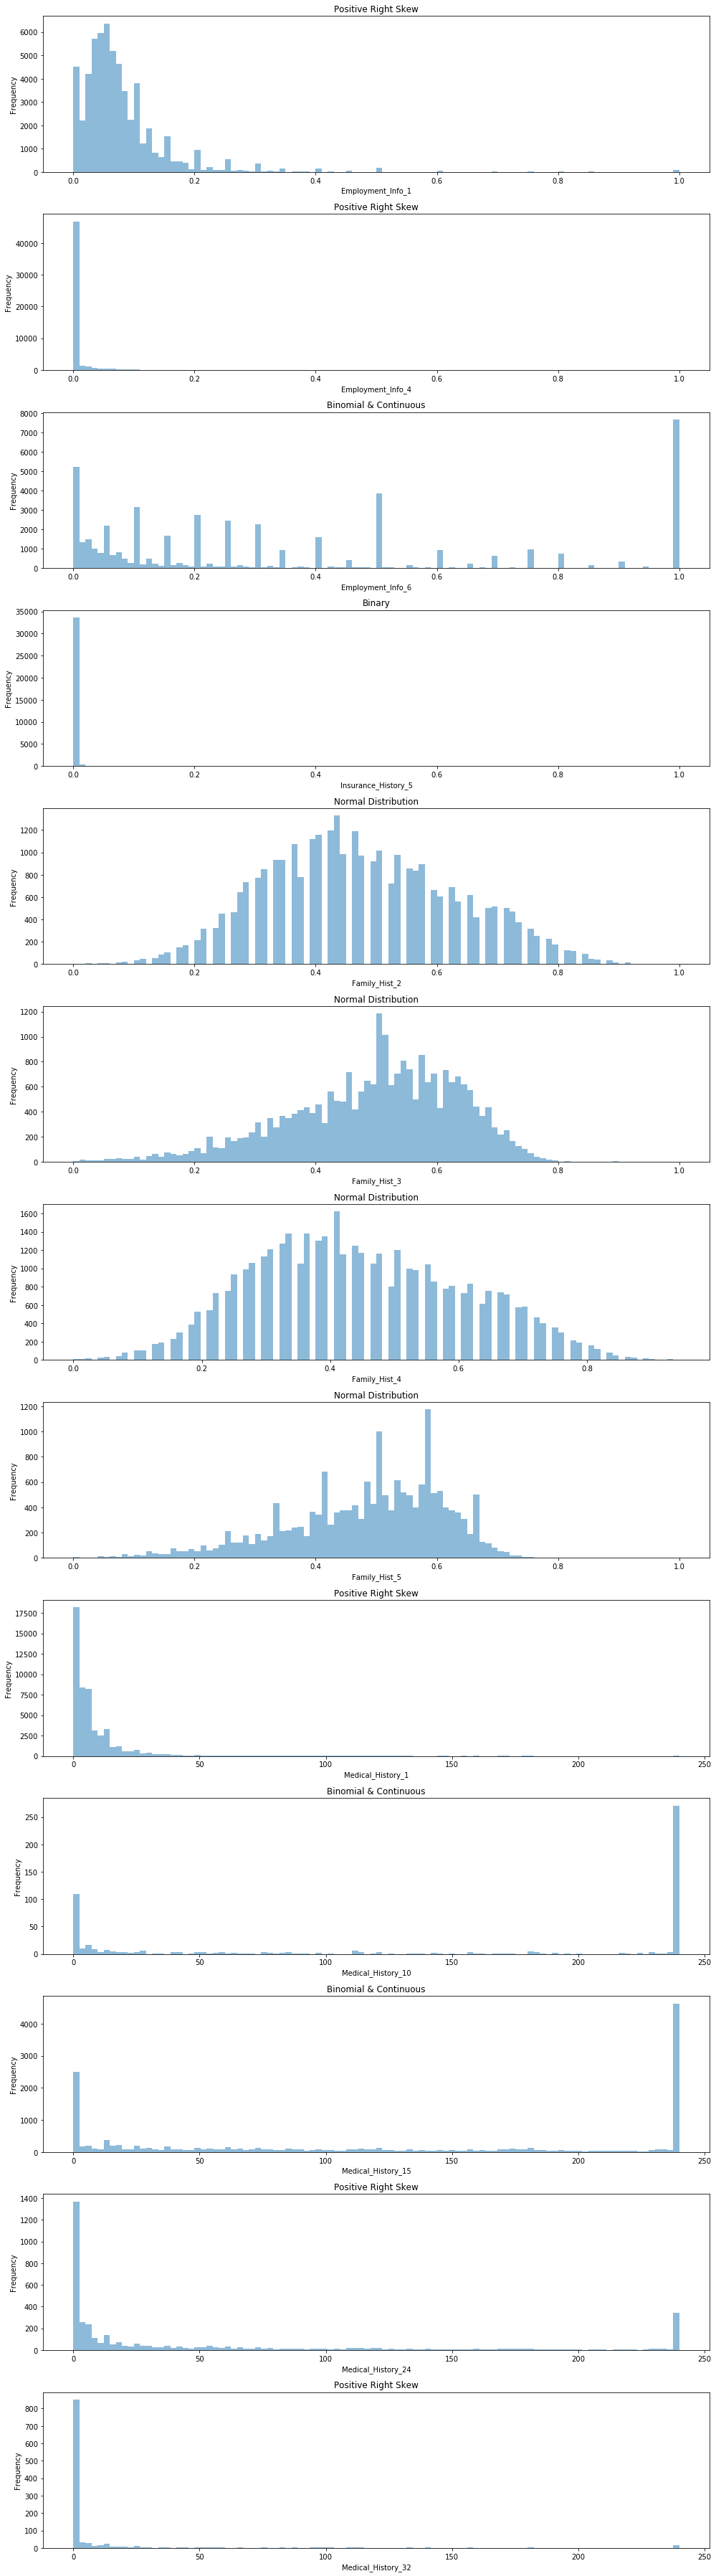

In [149]:
# A visual representation of the distribution for the above values 
list = ['Employment_Info_1','Employment_Info_4','Employment_Info_6','Insurance_History_5','Family_Hist_2','Family_Hist_3',
        'Family_Hist_4','Family_Hist_5','Medical_History_1','Medical_History_10','Medical_History_15',
        'Medical_History_24','Medical_History_32']

plt.rcParams['figure.figsize'] = (14.0, 50.0)

plt.subplot(13,1,1)    
df_nan[list[0]].plot(kind = 'hist',bins= 100, alpha = 0.5)
plt.title('Positive Right Skew')
plt.xlabel(list[0])

plt.subplot(13,1,2)    
df_nan[list[1]].plot(kind = 'hist',bins= 100, alpha = 0.5)
plt.title('Positive Right Skew')
plt.xlabel(list[1])

plt.subplot(13,1,3)    
df_nan[list[2]].plot(kind = 'hist',bins= 100, alpha = 0.5)
plt.title('Binomial & Continuous')
plt.xlabel(list[2])

plt.subplot(13,1,4)    
df_nan[list[3]].plot(kind = 'hist',bins= 100, alpha = 0.5)
plt.title('Binary')
plt.xlabel(list[3])

plt.subplot(13,1,5)    
df_nan[list[4]].plot(kind = 'hist',bins= 100, alpha = 0.5)
plt.title('Normal Distribution')
plt.xlabel(list[4])

plt.subplot(13,1,6)    
df_nan[list[5]].plot(kind = 'hist',bins= 100, alpha = 0.5)
plt.title('Normal Distribution')
plt.xlabel(list[5])

plt.subplot(13,1,7)    
df_nan[list[6]].plot(kind = 'hist',bins= 100, alpha = 0.5)
plt.title('Normal Distribution')
plt.xlabel(list[6])

plt.subplot(13,1,8)    
df_nan[list[7]].plot(kind = 'hist',bins= 100, alpha = 0.5)
plt.title('Normal Distribution')
plt.xlabel(list[7])

plt.subplot(13,1,9)    
df_nan[list[8]].plot(kind = 'hist',bins= 100, alpha = 0.5)
plt.title('Positive Right Skew')
plt.xlabel(list[8])

plt.subplot(13,1,10)    
df_nan[list[9]].plot(kind = 'hist',bins= 100, alpha = 0.5)
plt.title('Binomial & Continuous')
plt.xlabel(list[9])

plt.subplot(13,1,11)    
df_nan[list[10]].plot(kind = 'hist',bins= 100, alpha = 0.5)
plt.title('Binomial & Continuous')
plt.xlabel(list[10])

plt.subplot(13,1,12)    
df_nan[list[11]].plot(kind = 'hist',bins= 100, alpha = 0.5)
plt.title('Positive Right Skew')
plt.xlabel(list[11])

plt.subplot(13,1,13)    
df_nan[list[12]].plot(kind = 'hist',bins= 100, alpha = 0.5)
plt.title('Positive Right Skew')
plt.xlabel(list[12])


plt.tight_layout()

With over 120 features, now assess the contribution each feature towards the response variable. For those features with nan values we will drop those with over 70% missing values (which is 4 features):
<p>
<li><b>Feature  		 Nan Count   	 Pct Missing</b>
 r<li>Medical_History_10   	58824   	99.06%
<li>Medical_History_15   	44596   	75.10%
<li>Medical_History_24   	55580   	93.60%
<li>Medical_History_32   	58274   	98.14%

<p>
<p>Use various imputation strategies for missing data:
<li> Categorical varaible: Create dummy values for categorical variables. 0-missing, 1- non-missing 
<li> Continuous: using mean                 
<li> Normalization. 

In [5]:
df = df_base.drop(['Medical_History_10','Medical_History_15','Medical_History_24',
               'Medical_History_32'],axis=1)

In [28]:
#Check columns which still have missing values
df.isna().any()[lambda x: x]

Employment_Info_1      True
Employment_Info_4      True
Employment_Info_6      True
Insurance_History_5    True
Family_Hist_4          True
Medical_History_1      True
dtype: bool

In [29]:
#Apply mean/average value for missing values based on their normal distribution for features: 
# Family_Hist_2, Family_Hist_3, Family_Hist_5

df['Family_Hist_2'].fillna((df['Family_Hist_2'].mean()), inplace=True)
df['Family_Hist_3'].fillna((df['Family_Hist_3'].mean()), inplace=True)
df['Family_Hist_5'].fillna((df['Family_Hist_5'].mean()), inplace=True)

In [30]:
#Check columns which still have missing values
df.isna().any()[lambda x: x]

Employment_Info_1      True
Employment_Info_4      True
Employment_Info_6      True
Insurance_History_5    True
Family_Hist_4          True
Medical_History_1      True
dtype: bool

### Handling Outliers
<p>
Review of databset via: 'df.describe()' indicates the following fields have significant outliers: Medical_History_1, Medical_History_24, Medical_History_32. The later two features have already been dropped due to significant missing values. Therefore we can review just Medical_History_1.

Max: 240.0, Min: 0.0


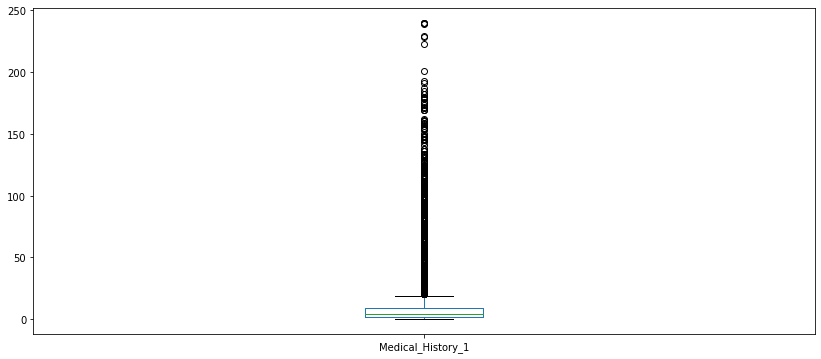

In [11]:
# Box Plot
print('Max: {}, Min: {}'.format(df['Medical_History_1'].max(),df['Medical_History_1'].min()))
df['Medical_History_1'].plot(kind='box')

Count 50+:  881
Count 100+:  171
Count 50+:  44


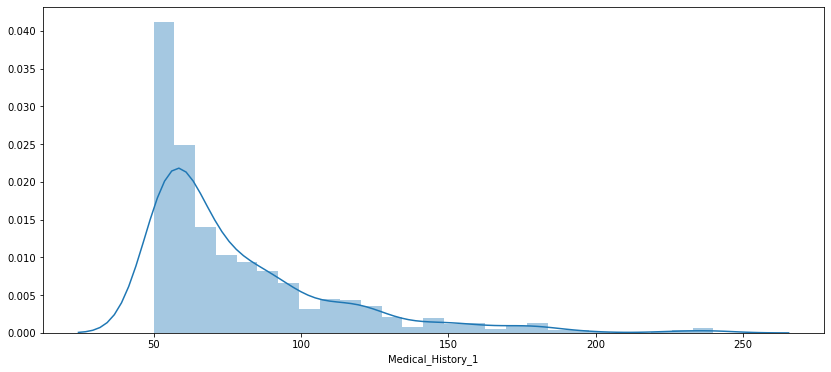

In [12]:
#Review the distribtion based on records where Medical_History_1 is greater than:
print('Count 50+: ',df[df['Medical_History_1'] >= 50]['Medical_History_1'].count())
print('Count 100+: ',df[df['Medical_History_1'] >= 100]['Medical_History_1'].count())
print('Count 50+: ',df[df['Medical_History_1'] >= 150]['Medical_History_1'].count())

#start to look at the distributions

df2 = df[df['Medical_History_1'] >= 50]

plt.rcParams['figure.figsize'] = (14.0,6.0)
sns.distplot(df2['Medical_History_1']);


Decision that we will drop all records where Medical History value is greater than 100.

In [31]:
#drop Medical History #1 values greater than 100 which appear as extreme outliers
df.drop(df[df['Medical_History_1'] >= 100].index, inplace = True)

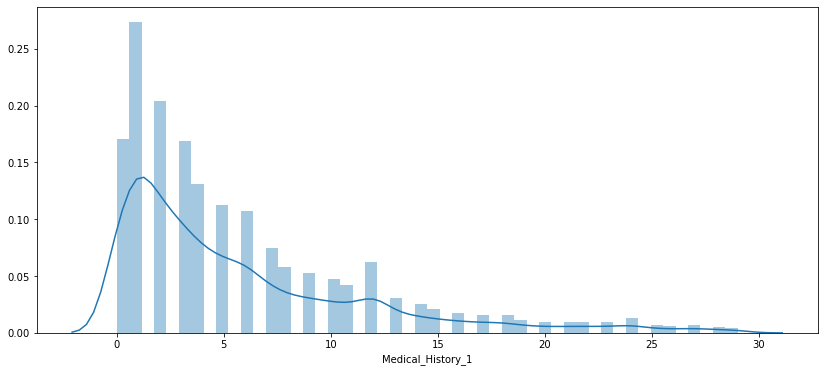

In [18]:
plt.rcParams['figure.figsize'] = (14.0,6.0)
sns.distplot(df['Medical_History_1']);

In [14]:
total = df['Id'].count() #Create total count of records
print("Feature  \t\t Nan Count   \t Pct")
for i,c in df.T.iterrows():
        
    count = sum(c.isnull())
    if count >0:                        
        print("%s   \t%5d   \t%.2f%%"  %(i, count, (count/total)*100))

Feature  		 Nan Count   	 Pct


In [33]:
#Apply Backfill/Pad method: filling gaps in data 
df.fillna(df.median(axis= 1),inplace = True)
df.fillna(method = 'pad',inplace = True)
df.fillna(method = 'bfill',inplace = True)

In [34]:
print('Number of records null: ',df.isnull().sum().sum())

Number of records null:  0


<b>Factorize</b> - method, used to get the numeric representation of an array by identifying distinct values. 

In [95]:
# By looking at the dtypes of the features we can see all are numerical apart from 'Product Info 2' 
# which is an alpha numeric 'object'.

print('Summary of Data types')
print(df.dtypes.value_counts())
print()
dataTypeSeries = df.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Summary of Data types
int64      110
float64     15
dtype: int64

Data type of each column of Dataframe :
Id                      int64
Product_Info_1          int64
Product_Info_2          int64
Product_Info_3          int64
Product_Info_4        float64
                       ...   
Medical_Keyword_46      int64
Medical_Keyword_47      int64
Medical_Keyword_48      int64
Response                int64
BMI_Age               float64
Length: 125, dtype: object


In [18]:
#Pre-conversion:
df_base['Product_Info_2'].value_counts()

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

In [35]:
prod_info = pd.factorize(df['Product_Info_2']) #Encode the object as an enumerated type.
prod_info = prod_info[0]
df['Product_Info_2'] = prod_info

print(df['Product_Info_2'].describe())

count    59210.000000
mean         4.027242
std          3.550874
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         18.000000
Name: Product_Info_2, dtype: float64


In [20]:
#Post-conversion:
df['Product_Info_2'].value_counts()

0     14321
3     10812
5      6835
7      6554
4      6286
2      2647
1      2363
9      2098
6      1974
8      1383
14     1122
10      977
11      775
15      306
13      285
12      219
17      210
16      160
18       54
Name: Product_Info_2, dtype: int64

In [36]:
#Finally, check if there are any duplicated rows.
df[df.duplicated(keep=False)]

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response


### Feature Building
Create a new features: Given that BMI (Body mass index), Weight and Age are important features for categorizing insurance risk of a client, we can create new features by combining existing features e.g. Multiply the value between BMI and Ins_Age to create <b>BMI_Age</b>

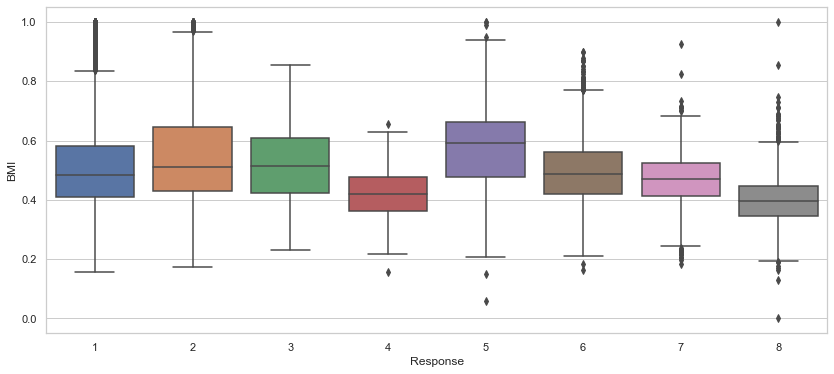

In [331]:
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
sns.boxplot(x="Response", y='BMI', data=df);

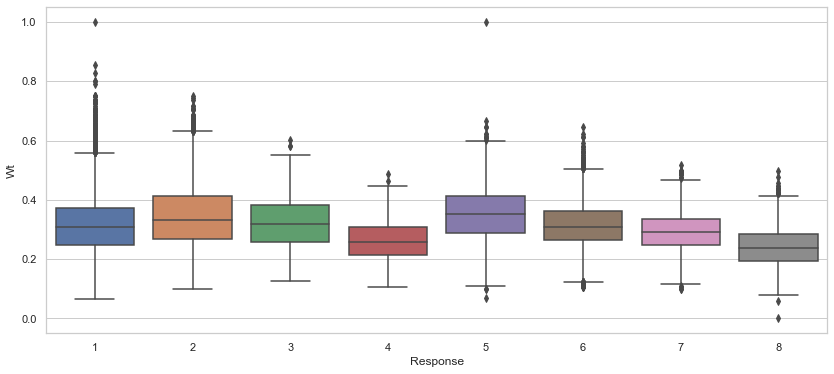

In [330]:
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
sns.boxplot(x="Response", y='Wt', data=df);

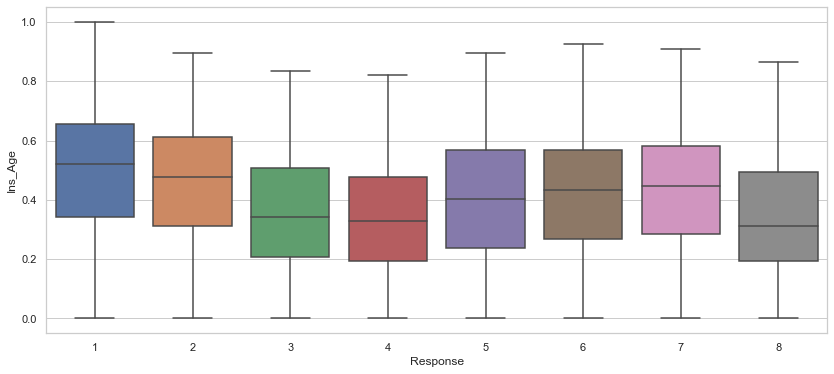

In [329]:
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
sns.boxplot(x="Response", y='Ins_Age', data=df);

In [24]:
df = df.assign(BMI_Age = lambda x: x.BMI * x.Ins_Age)

In [25]:
df[['BMI','Ins_Age','BMI_Age']].head()

,BMI,Ins_Age,BMI_Age
0,0.323008,0.641791,0.207304
1,0.272288,0.059701,0.016256
2,0.428780,0.029851,0.012799
3,0.352438,0.164179,0.057863
4,0.424046,0.417910,0.177213


Use pairwise plots among our expected important features to visualise any relationships.
As we might expect, there is a strong positive relationship between BMI and Weight.

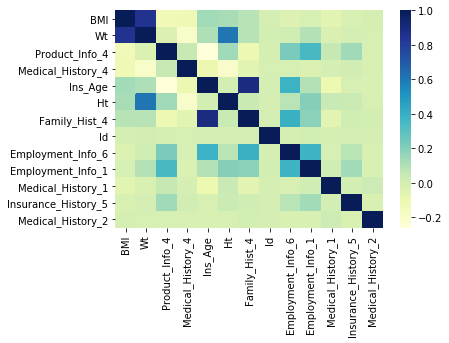

In [14]:
#Correlation Analysis to review features which maybe highly correlated.
df_corr = df[['BMI','Wt','Product_Info_4','Medical_History_4','Ins_Age','Ht','Family_Hist_4','Id','Employment_Info_6',
'Employment_Info_1','Medical_History_1','Insurance_History_5','Product_Info_2','Medical_History_2']]

import seaborn as sns
sns.heatmap(df_corr.corr(),cmap="YlGnBu")

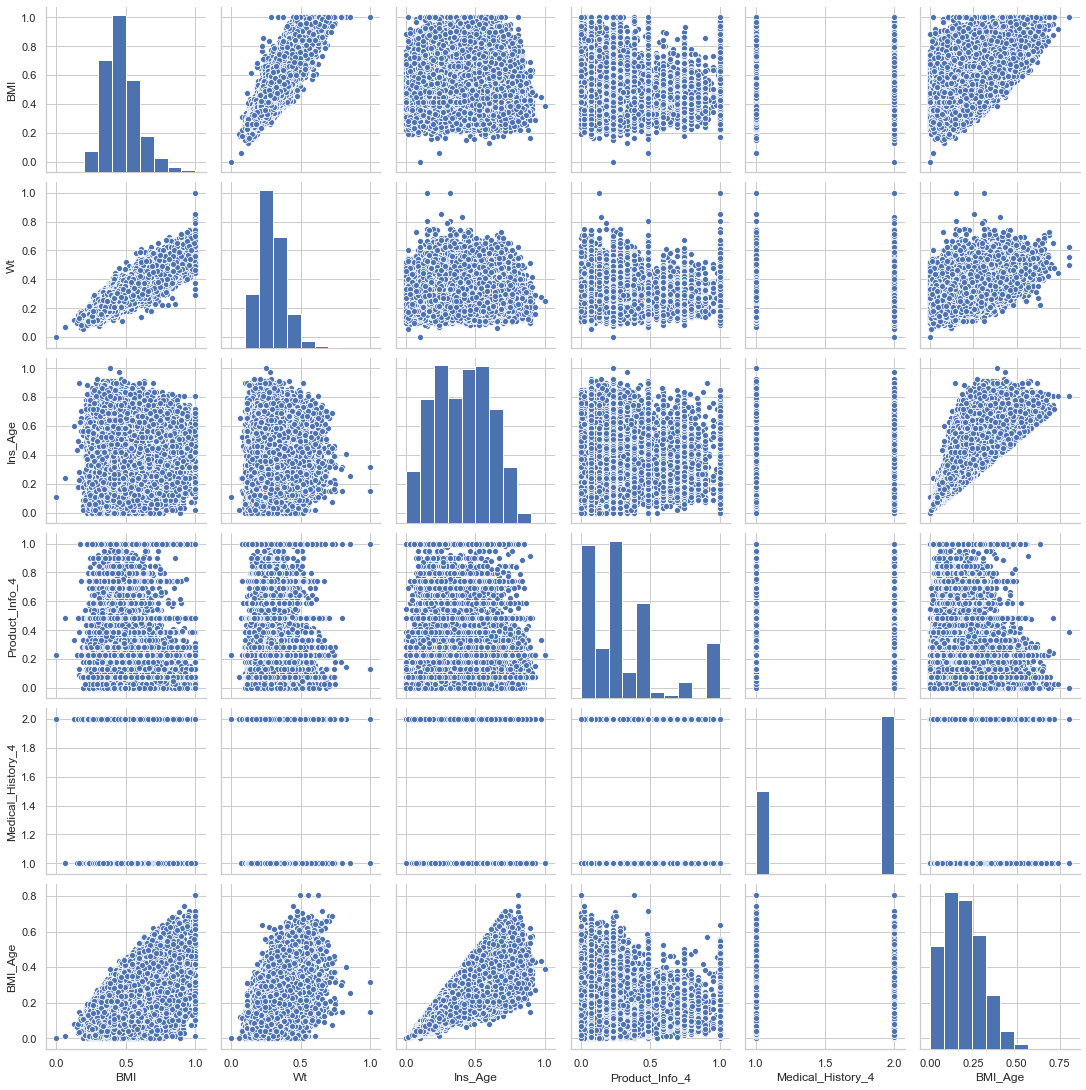

In [27]:
df_corr = df[['BMI','Wt','Ins_Age','Product_Info_4','Medical_History_4','BMI_Age']]
sns.pairplot(df_corr)

In [37]:
# Seperate out or Features 'X' from our reponse 'y'.
y = df['Response']
X = df.drop(['Response'],axis=1)
df_train = df.drop(['Response'],axis=1)

In [38]:
#Pre-processing out data by scaling is neccessary for various Machine Learning classifiers to work.
X = preprocessing.scale(df_train)
y = np.asarray(y).flatten().astype(float)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 2019)

## Feature Selection
To determine those features which contribute most to prediction variable: 'Response". Benefits of performing feature selection before modeling your data: 
<p>
<li>Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
<li>Improves Accuracy: Less misleading data means modeling accuracy improves.
<li>Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

<p><p>Classifier used will be Extremely Randomized Trees - 'ExtraTreesClassifier'.
<p>
The reasons for this choice include: its robustness to overfitting; it provides an average across a number of randomly sampled features from our feature set;  this helps to reduce variance (albeit at the expense of bias).
<p>
 As we are using a (relatively) small data set of n=60000, we can afford the computational expense of fitting 100 trees.
    
<a href="https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e"> Feature Selection Reference</a>

In [40]:
clf = ExtraTreesClassifier(n_estimators = 100, random_state = 0)

clf.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

With our fitted classifier we can show the most important features.

In [42]:
imp = pd.DataFrame({'features':df_train.columns,'importance':clf.feature_importances_})

imp_head = imp.sort_values(by = 'importance', ascending =False)[:40]
imp_head = imp_head.sort_values(by = 'importance', ascending = False)
imp_head

,features,importance
11,BMI,0.067409
10,Wt,0.048707
4,Product_Info_4,0.032179
8,Ins_Age,0.030226
41,Medical_History_4,0.028858
9,Ht,0.025992
36,Family_Hist_4,0.025966
0,Id,0.025831
17,Employment_Info_6,0.025289
12,Employment_Info_1,0.025055


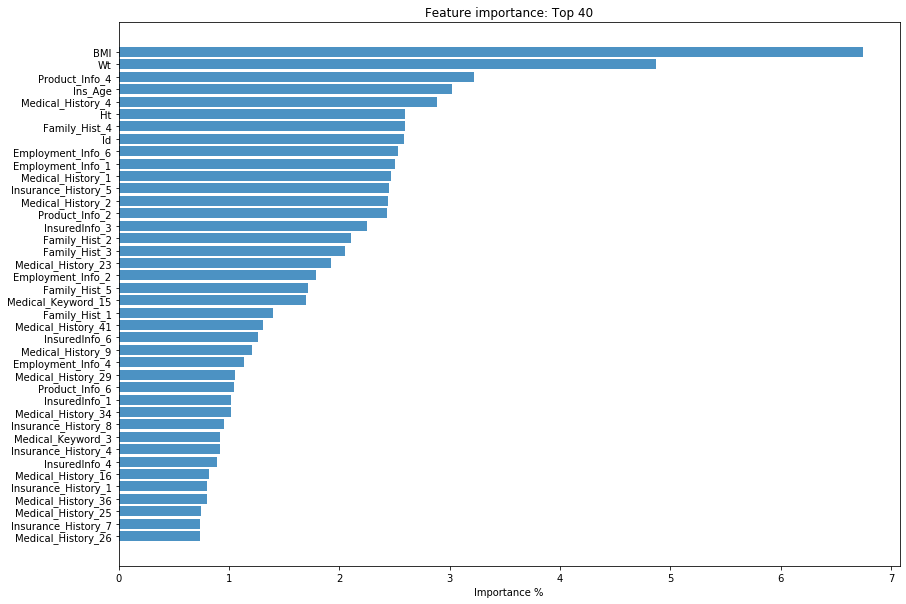

In [43]:
imp_head = imp_head.sort_values(by = 'importance', ascending = True)
plt.rcParams['figure.figsize'] = (14.0,10.0)
plt.barh(np.arange(len(imp_head))+.5,imp_head.importance*100,
         align = 'center', alpha = 0.8)
plt.yticks(np.arange(len(imp_head))+.5, imp_head.features.values)         
plt.title('Feature importance: Top 40')
plt.xlabel('Importance %');

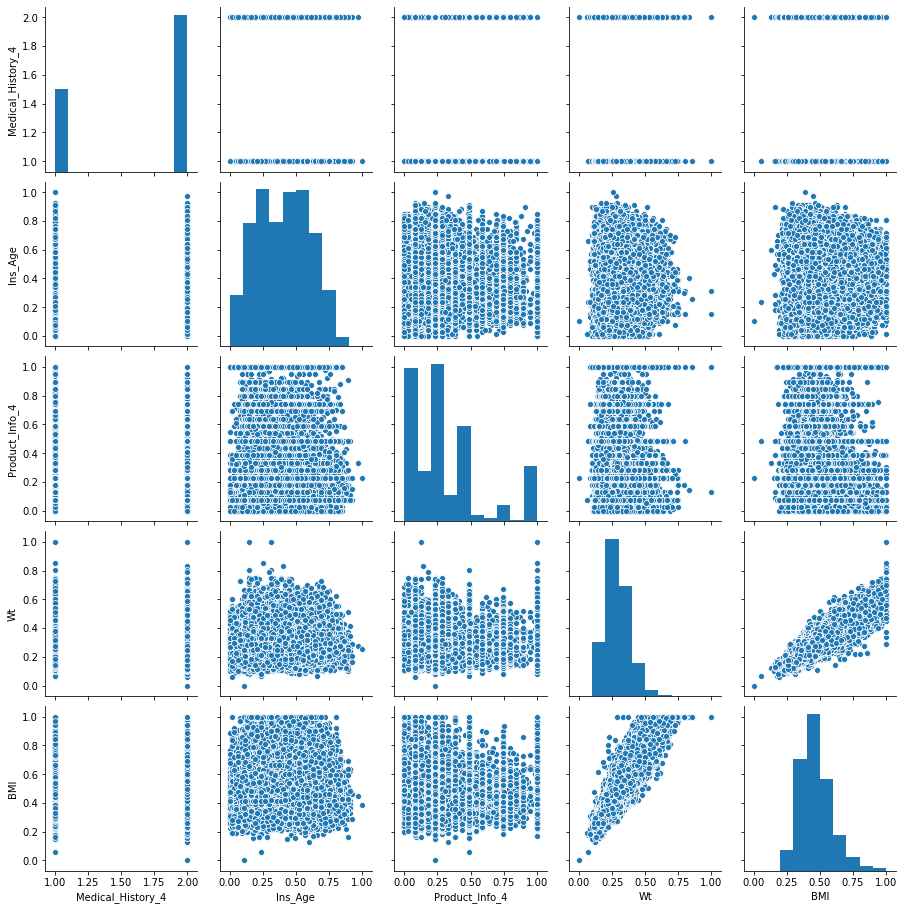

In [44]:
sns.pairplot(df[imp_head.features[-5:]])

<li>Top 40 Features account for over 75% of the importance in our model.
<li>Top 20 Features account for over 50% of the importance in our model.

By way of comparison to our Extra Trees model above, run a Principal Components Analysis on the same Feature set
and we see that where Extra Trees showed the 1st:
<li> 40 Features accounted for around 75% of the variance in the data, PCA returns 55%.
<li> 20 Features accounted for around 50% of the variance in the data, PCA returns 38%.

Variance explained by first 20 components): 36.33%


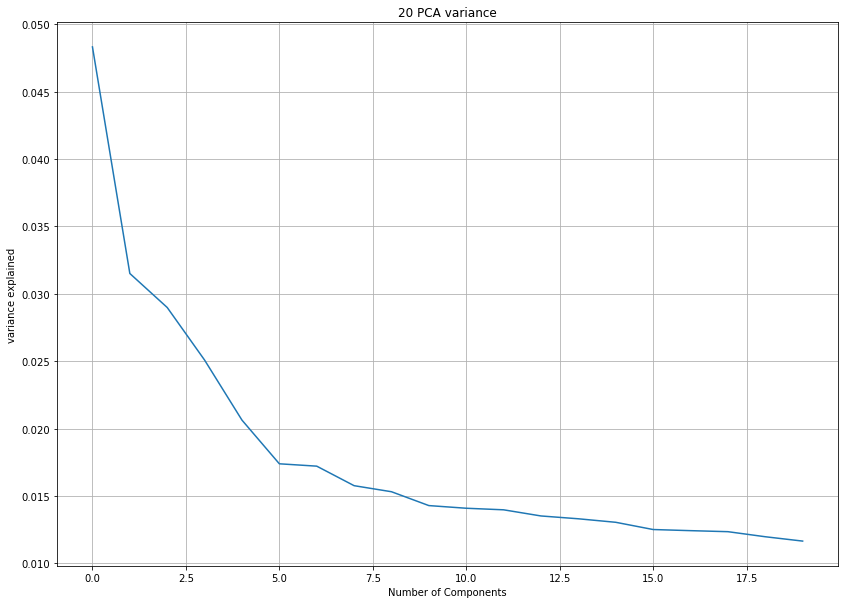

In [69]:
pca = PCA(n_components = 20)

pca.fit(X_train).transform(X_train)


s = pca.explained_variance_ratio_

plt.grid()
plt.plot(s)
plt.xlabel('Number of Components')
plt.ylabel('variance explained')
plt.title('20 PCA variance')


print ('Variance explained by first %d components): %.2f%%'%(20, sum(pca.explained_variance_ratio_)*100))

We can delve deeper into the Features that we now know to be most significant and apply greater statistical scrutiny.

Take a look at the relative distributions of 'BMI' for each of the responses:
Most distributions are right skewed but most noticeable is the difference in distributions amongst the responses (this is in part due to the difference in sample size for each of the 1-8 response variables - see 1st chart), which enforces the need for correct sampling techniques when training a model.

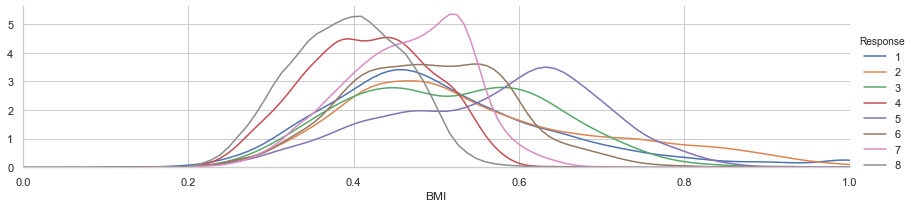

In [74]:
dist_plot = sns.FacetGrid(df, hue="Response",aspect=4, hue_order=[1,2,3,4,5,6,7,8])
dist_plot.map(sns.kdeplot,'BMI')

dist_plot.add_legend()
dist_plot.set(xlim=(0, 1.0))

In [134]:
#Update data frame based on Top 40 significant features.
df_train = df.filter(items=['BMI','Wt','BMI_Age','Product_Info_4','Medical_History_4','Ins_Age','Ht','Family_Hist_4','Id','Employment_Info_6',
'Employment_Info_1','Medical_History_1','Insurance_History_5','Product_Info_2','Medical_History_2','InsuredInfo_3',
'Family_Hist_2','Family_Hist_3','Medical_History_23','Medical_Keyword_15','Employment_Info_2','Family_Hist_5',
'Family_Hist_1','Medical_History_41','InsuredInfo_6','Medical_History_9','Employment_Info_4','Medical_History_29',
'InsuredInfo_1','Product_Info_6','Medical_History_34','Insurance_History_8','Medical_Keyword_3','Insurance_History_4',
'InsuredInfo_4','Medical_History_16','Medical_History_36','Insurance_History_1','Medical_History_25','Medical_History_26'])

In [45]:
#Update data frame based on Top 20 significant features.
df_train = df.filter(items=['BMI','Wt','BMI_Age','Product_Info_4','Medical_History_4','Ins_Age','Ht','Family_Hist_4','Id','Employment_Info_6',
'Employment_Info_1','Medical_History_1','Insurance_History_5','Product_Info_2','Medical_History_2','InsuredInfo_3',
'Family_Hist_2','Family_Hist_3','Medical_History_23','Medical_Keyword_15'])

In [95]:
#Pre-processing out data by scaling is neccessary for various Machine Learning classifiers to work.
X = preprocessing.scale(df_train)

#Used but disabled with calculating Quadratic Weighted Kappa score
y = np.asarray(y).flatten().astype(float)

#Validate size of the array
X.shape

(59210, 19)

## Prediction Techniques

<b>References:</b> 
<li> <a href='https://www.soa.org/globalassets/assets/files/research/projects/research-pred-mod-life-batty.pdf'>Predictive Modeling for Life Insurance, Deloitte Consulting</a>
<li><a href='https://www.sas.com/en_ca/industry/insurance.html'>SAS Insurance Industry Whitepaper</a>
<li><a href='https://www.genpact.com/downloadable-content/insight/operationalizing-analytics-to-improve-insurers-claims-decisions.pdf'>Operationalizing analytics to improve insurers’ claims decisions</a>
<li><a href='https://www.genpact.com/downloadable-content/insight/underwriting-analytics-in-p-c-insurance.pdfUnderwriting'>Analytics in P&C Insurance</a>
<li><a href='https://www.genpact.com/insight/solution-overview/claims-segmentation-and-triage-analytics'>Claims segmentation and triage analytics</a>
<li><a href='http://support.sas.com/resources/papers/proceedings17/1003-2017.pdf'>Property and Casualty Insurance Predictive Analytics in SAS</a>
<li><a href='https://www.slideshare.net/sirghbarrett/analytics-in-pc-insurance'>Analytics in P&C Insurance</a>

To consider available models for prediction:
<li>View challenge as a 'Multi-Class' Classification problem (with 8 target responses 1-8) for our risk ratings.
<li>View challenge as Regression and a Classification task: an 'Ordinal Regression' task. The 'ordinal' nature of the response variable (a risk rating).
<p>
<p>For all models we will apply Grid Search CV to perform Cross-Valuation and to select optimal Hyperparameters.

We will use Gradient Boosting Classifier for its performance and Grid Search CV to perform Cross Validation and select our Hyperparameters. THen apply the hyperparameters to a model pipeline which includes scaling of values to ensure proper normalization and SMOTE (Synthetic Minority Over-sampling Techniques), an oversampling approach that creates synthetic minority class samples.

In [ ]:
# Function to build out Confusion Matrix for the corresponding models.
def Confusion_Matrix(y_test,y_pred):
    data = {'y_Actual': y_test,
            'y_Predicted': y_pred
            }

    df_matrix = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(df_matrix['y_Actual'], df_matrix['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

    sns.heatmap(confusion_matrix, annot=True)
    print (confusion_matrix)
    plt.figure(figsize=(14,14))
    plt.show()

### XG Boost

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.
<p>The implementation of XGBoost offers several advanced features for model tuning, computing environments and algorithm enhancement. It is capable of performing the three main forms of gradient boosting (Gradient Boosting (GB), Stochastic GB and Regularized GB) and it is robust enough to support fine tuning and addition of regularization parameters.

In [46]:
#Pre-processing out data by scaling is neccessary for various Machine Learning classifiers to work.
X = preprocessing.scale(df_train)
# y = np.asarray(y).flatten().astype(float)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 2019)

params= {
        'min_child_weight': [1, 5], #10
        'gamma': [0.5, 1, 1.5], #2,5
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4] #5
}
                      
kfold = StratifiedKFold(n_splits=10)
grid = GridSearchCV(XGBClassifier(),param_grid=params, verbose=1, cv=kfold, n_jobs=-1)

grid.fit(X_train,y_train)
print("Best Parameters: \n{}\n".format(grid.best_params_)) #Best parameters used for the highest score of the model

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 69.4min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 89.1min finished


Best Parameters: 
{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}



We will then use these values to train our  optimized classifier.
<p>
The end result provides a performance of the default model configuration on the dataset including both the mean and standard deviation classification accuracy.

In [188]:
X_scaled = preprocessing.scale(df_train)

### XGBoost - Pipeline with Cross-Validation
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=2019)

 # sampling_strategy = 'auto': resample all classes but the majority class
smt = SMOTE(random_state=2019, sampling_strategy='auto')
pipe = Pipeline([
    ('smt',smt),
    ('scaler',MinMaxScaler()),
    ('model', XGBClassifier(colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0))
],verbose=True)

pipe.fit(X_train_full, y_train_full)
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

# The cross_val_score() function from scikit-learn allows us to evaluate a model using the cross validation scheme and 
# returns a list of the scores for each model trained on each fold.
results = cross_val_score(pipe,X,y, cv=5)
print(results)
print('Mean score',results.mean())
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

#Get Training score
train_pred = pipe.predict(X_train_full)
print('Training score: ',accuracy_score(y_train_full, train_pred))
print(classification_report(y_test, y_pred))

[Pipeline] ............... (step 1 of 3) Processing smt, total=   6.2s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=  39.1s
[Pipeline] ............... (step 1 of 3) Processing smt, total=   7.6s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=  48.0s
[Pipeline] ............... (step 1 of 3) Processing smt, total=   8.0s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=  48.6s
[Pipeline] ............... (step 1 of 3) Processing smt, total=   7.9s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=  55.5s
[Pipeline] ............... (step 1 of 3) Processing smt, total=   9.2s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipel

Predicted    1    2    3    4    5     6    7     8
Actual                                             
1          316  136   60  108  162   389  209   411
2          190  333   61   87  233   412  191   459
3            9    7   62   57   34    87    6    24
4            8    5    8  192    1   106   15   109
5           72  150  116   14  744   284   66   158
6          201   84   64  231  108  1424  411   925
7          132   31   19   87    9   493  748   843
8           42   15    5  184    6   337  192  5081


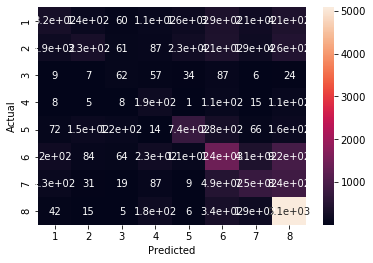

<Figure size 1008x1008 with 0 Axes>

In [187]:
Confusion_Matrix(y_test,y_pred)

### Gradient Boosting Classifier

In [28]:
#Pre-processing out data by scaling is neccessary for various Machine Learning classifiers to work.
X_scaled = preprocessing.scale(df_train)
y_scaled = np.asarray(y).flatten().astype(float)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled,test_size=0.3, random_state = 2019)

params= {
    "loss":["deviance"],
#     "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
#     "min_samples_split": np.linspace(0.1, 0.5, 12),
#     "min_samples_leaf": np.linspace(0.1, 0.5, 12),
     "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
#    "criterion": ["friedman_mse",  "mae"],
#    "subsample":[0.5, 0.8, 0.9, 0.95, 1.0],
#    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
}

kfold = StratifiedKFold(n_splits=10)
grid = GridSearchCV(GradientBoostingClassifier(),param_grid=params, verbose=1, cv=kfold, n_jobs=-1)

grid.fit(X_train,y_train)
print("Best Parameters: \n{}\n".format(grid.best_params_)) #Best parameters used for the highest score of the model

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   42.4s finished


Best Parameters: 
{'loss': 'deviance', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 10}



In [171]:
X_scaled = preprocessing.scale(df_train)
### XGBoost - Pipeline with Cross-Validation
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=2019)

smt = SMOTE(random_state=2019)

pipe = Pipeline([
    ('smt',smt),
    ('scaler',MinMaxScaler()),
    ('model',GradientBoostingClassifier(loss='deviance', max_depth=8, max_features='log2',n_estimators=10))
],verbose=True)

pipe.fit(X_train_full, y_train_full)
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

# The cross_val_score() function from scikit-learn allows us to evaluate a model using the cross validation scheme and 
# returns a list of the scores for each model trained on each fold.
results = cross_val_score(pipe,X,y, cv=5)
print(results)
print('Mean score',results.mean())
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

#Get Training score
train_pred = pipe.predict(X_train_full)
print('Training score: ',accuracy_score(y_train_full, train_pred))
print(classification_report(y_test, y_pred))

[Pipeline] ............... (step 1 of 3) Processing smt, total=   6.6s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=  32.7s
[Pipeline] ............... (step 1 of 3) Processing smt, total=   9.1s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.1s
[Pipeline] ............. (step 3 of 3) Processing model, total=  41.4s
[Pipeline] ............... (step 1 of 3) Processing smt, total=   9.3s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=  39.1s
[Pipeline] ............... (step 1 of 3) Processing smt, total=   9.1s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=  37.9s
[Pipeline] ............... (step 1 of 3) Processing smt, total=  10.2s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipel

Predicted    1    2    3    4    5    6    7     8
Actual                                            
1          346  165  103  214  204  167  271   321
2          253  318  126  158  293  194  267   357
3           12    7   84   85   41   33    8    16
4           16    7   19  271    0   45   21    65
5           80  116  172   47  855  114  110   110
6          324  137  174  573  299  726  564   651
7          189   54   45  186   39  258  998   593
8          119   44   14  439   17  227  500  4502


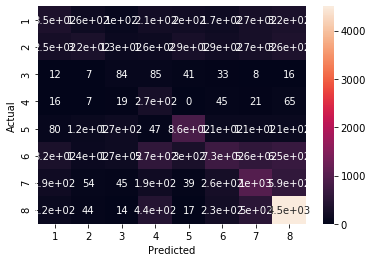

<Figure size 1008x1008 with 0 Axes>

In [166]:
Confusion_Matrix(y_test,y_pred)

## Random Forest

The random forest is one of many supervised machine learning algorithms that can be used to predict an outcome, whether that outcome is a number (a prediction process we call regression) or represents membership in a group (known as classification). It’s a non-parametric model, and thus does not make any strong assumptions about the data distribution, or specify any parameters (like the slope of a linear regression line).

Random forest also uses the ensemble learning method, meaning it combines many underlying models into one, using all the individual models’ predictions together. The models it combines together are called decision trees.

Reference: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [31]:
#Pre-processing out data by scaling is neccessary for various Machine Learning classifiers to work.
X = preprocessing.scale(df_train)
y = np.asarray(y).flatten().astype(float)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 2019)

params = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200] #300, 1000
} 
kfold = StratifiedKFold(n_splits=10)
grid = GridSearchCV(RandomForestClassifier(),param_grid=params, cv=kfold, verbose=1, n_jobs=-1)

grid.fit(X_train,y_train)
print("Best Parameters: \n{}\n".format(grid.best_params_)) #Best parameters used for the highest score of the model

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 48.0min finished


Best Parameters: 
{'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}



In [96]:
### Random Forest - Pipeline with Cross-Validation
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)
# sampling_strategy= dict({3:12000})
smt = SMOTE(random_state=2019,sampling_strategy='auto')

pipe = Pipeline([   
     ('smt', smt),
    ('scaler',MinMaxScaler()),
    ('model',RandomForestClassifier(bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200))
],verbose=True)

pipe.fit(X_train_full, y_train_full)
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)
results = cross_val_score(pipe,X,y,cv=5)
print(results)
print('Mean score',results.mean())
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

#Get Training score
train_pred = pipe.predict(X_train_full)
print('Training score: ',accuracy_score(y_train_full, train_pred))
print(classification_report(y_test, y_pred))

[Pipeline] ............... (step 1 of 3) Processing smt, total=   7.7s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total= 1.1min
[Pipeline] ............... (step 1 of 3) Processing smt, total=   7.7s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total= 1.1min
[Pipeline] ............... (step 1 of 3) Processing smt, total=   7.8s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total= 1.1min
[Pipeline] ............... (step 1 of 3) Processing smt, total=   7.8s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total= 1.1min
[Pipeline] ............... (step 1 of 3) Processing smt, total=   8.2s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipel

Predicted  1.0  2.0  3.0  4.0  5.0  6.0  7.0   8.0
Actual                                            
1.0        360  157   29   26  121  133  128   251
2.0        222  280   28   20  206  159  117   272
3.0         12    9   40   21   33   46    8    21
4.0         17    1   10   91    1   53   19   116
5.0         69  111   35    5  592  113   39   102
6.0        207  150   56  113  217  694  245   625
7.0        108   29   15   34   58  234  497   618
8.0         46    4   17   76   13  211  183  3319


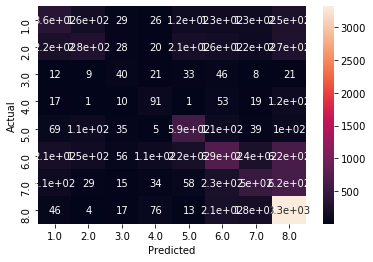

<Figure size 1008x1008 with 0 Axes>

In [111]:
Confusion_Matrix(y_test,y_pred)

In [60]:
#RandomForest Tree diagram

model = RandomForestClassifier(bootstrap=True, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200)
model.fit(X_train_full, y_train_full)
y_pred = model.predict(X_test)

# Extract single tree
estimator = model.estimators_[10]

export_graphviz(estimator, out_file='tree.dot', filled=True, proportion=True, special_characters=True)

import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

<img src="tree.png" />

### LogisticRegression

Logistic Regression is one of the most used Machine Learning algorithms for simple/binary classification. 
Logistic regression gives you a discrete outcome while linear regression provides a continuous outcome. 

In [25]:
#Pre-processing out data by scaling is neccessary for various Machine Learning classifiers to work.
X = preprocessing.scale(df_train)
# y = np.asarray(y).flatten().astype(float)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 2019)

params = {
    'penalty':['l1', 'l2'],        # l1 is Lasso, l2 is Ridge
    'solver':['liblinear'],
    'C':[0.001,.009,0.01,.09,1,5,10,25]
} 
kfold = StratifiedKFold(n_splits=10)
grid = GridSearchCV(LogisticRegression(),param_grid=params, cv=kfold, verbose=1, n_jobs=-1)

grid.fit(X_train,y_train)
print("Best Parameters: \n{}\n".format(grid.best_params_)) #Best parameters used for the highest score of the model

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  8.4min finished


Best Parameters: 
{'C': 25, 'penalty': 'l1', 'solver': 'liblinear'}



In [34]:
### LogisticRegression - Pipeline with Cross-Validation using best parameters.
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

smt = SMOTE(random_state=2019)

pipe = Pipeline([   
     ('smt', smt),
    ('scaler',MinMaxScaler()),
    ('model',LogisticRegression(C=25, penalty='l1', solver='liblinear', max_iter= 200))
],verbose=True)

pipe.fit(X_train_full, y_train_full)
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)
results = cross_val_score(pipe,X,y,cv=5)
print(results)
print('Mean score',results.mean())
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

#Get Training score
train_pred = pipe.predict(X_train_full)
print('Training score: ',accuracy_score(y_train_full, train_pred))
print(classification_report(y_test, y_pred))

[Pipeline] ............... (step 1 of 3) Processing smt, total=   3.8s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.4s
[Pipeline] ............. (step 3 of 3) Processing model, total=15.1min
[Pipeline] ............... (step 1 of 3) Processing smt, total=   3.5s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.3s
[Pipeline] ............. (step 3 of 3) Processing model, total=15.5min
[Pipeline] ............... (step 1 of 3) Processing smt, total=   3.3s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.3s
[Pipeline] ............. (step 3 of 3) Processing model, total=12.7min
[Pipeline] ............... (step 1 of 3) Processing smt, total=   3.3s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.3s
[Pipeline] ............. (step 3 of 3) Processing model, total=12.2min
[Pipeline] ............... (step 1 of 3) Processing smt, total=   3.2s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.3s
[Pipel

Predicted    1    2    3    4    5    6    7     8
Actual                                            
1          241  106  162  148  160   58  122   208
2          192  148  205  130  240   55  114   220
3            5    5   82   67   11   10    3     7
4           13    0   52  195    4   11    5    28
5          100   86  241   47  377   36   55   124
6          233  163  323  481  310  220  215   362
7          179   83  110  137  206   95  374   409
8          101   42   56  422  152   89  164  2843


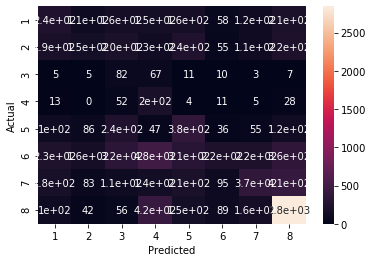

<Figure size 1008x1008 with 0 Axes>

In [162]:
Confusion_Matrix(y_test,y_pred)

### AdaBoostClassifier

<p>   
Ada-boost or Adaptive Boosting is one of ensemble boosting classifier. It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations. Any machine learning algorithm can be used as base classifier if it accepts weights on the training set. Adaboost should meet two conditions:

<li>The classifier should be trained interactively on various weighed training examples.
<li> In each iteration, it tries to provide an excellent fit for these examples by minimizing training error.

<p>This class implements the algorithm known as AdaBoost-SAMME and AdaBoost-SAMME-R.


In [22]:
param_grid = { 
            'algorithm' : ['SAMME', 'SAMME.R'],
            'learning_rate': [0.01,0.2,0.5],
            'n_estimators': [1.0, 10, 50, 100, 200, 1000]
             }


DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)

model = AdaBoostClassifier(base_estimator = DTC)

# run grid search
kfold = StratifiedKFold(n_splits=10)
grid = GridSearchCV(model, param_grid=param_grid, cv=kfold, verbose=1, n_jobs=-1)

grid.fit(X_train,y_train)
print("Best Parameters: \n{}\n".format(grid.best_params_)) #Best parameters used for the highest score of the model

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   14.0s finished


Best Parameters: 
{'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 50}



In [172]:
### AdaBoost - Pipeline with Cross-Validation using best parameters.
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

smt = SMOTE(random_state=2019)

pipe = Pipeline([   
     ('smt', smt),
    ('scaler',MinMaxScaler()),
    ('model',AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, n_estimators=200))
],verbose=True)

pipe.fit(X_train_full, y_train_full)
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)
results = cross_val_score(pipe,X,y,cv=5)
print(results)
print('Mean score',results.mean())
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

#Get Training score
train_pred = pipe.predict(X_train_full)
print('Training score: ',accuracy_score(y_train_full, train_pred))
print(classification_report(y_test, y_pred))

[Pipeline] ............... (step 1 of 3) Processing smt, total=   8.3s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total= 1.0min
[Pipeline] ............... (step 1 of 3) Processing smt, total=   9.1s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total= 1.1min
[Pipeline] ............... (step 1 of 3) Processing smt, total=   9.3s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total= 1.1min
[Pipeline] ............... (step 1 of 3) Processing smt, total=   9.7s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total= 1.1min
[Pipeline] ............... (step 1 of 3) Processing smt, total=   8.7s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipel

Predicted  1.0  2.0  3.0  4.0  5.0  6.0  7.0   8.0
Actual                                            
1.0        137  84   95   218  249  64   192  207 
2.0        142  106  111  162  363  51   183  224 
3.0        12   8    83   66   17   13   0    4   
4.0        13   0    7    211  0    22   10   18  
5.0        35   50   187  43   572  34   74   89  
6.0        194  97   181  601  317  216  317  305 
7.0        161  45   24   187  68   113  635  376 
8.0        45   2    5    473  19   119  433  2788


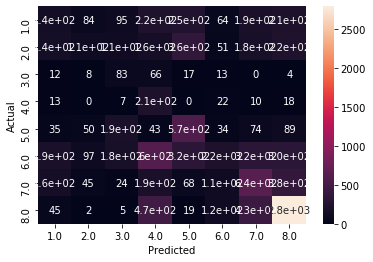

In [290]:
Confusion_Matrix(y_test,y_pred)

### Modeling Scores

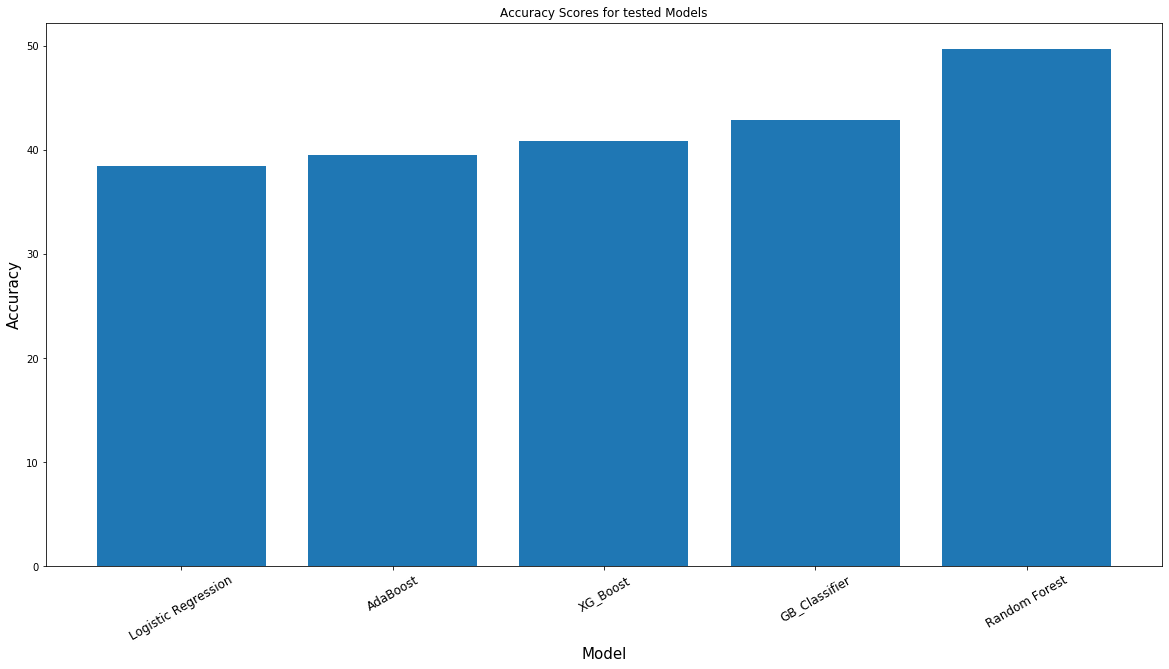

In [177]:
import matplotlib.pyplot as plt
import numpy as np
label = ['Logistic Regression', 'AdaBoost', 'XG_Boost','GB_Classifier','Random Forest']
t_scores = [38.43, 39.49,40.85,42.9,49.71]

index = np.arange(len(label))
plt.figure(figsize=(20,10))
plt.bar(index, t_scores)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(index, label, fontsize=12, rotation=30)
plt.title('Accuracy Scores for tested Models')
plt.show()

### Quadratic Weighted Kappa score

Submissions to Prudential Life Insurance Kaggle challenge are scored based on the Quadratic weighted kappa score, which is a chance-adjusted measure of agreement between two ratings (expected vs known). This metric typically varies from:
0 (random agreement) between the raters
1 (complete agreement) between raters. 

Quadratic_Kappa score: 0.431

The original kappa coefficient assumed nominal categories but this was later extended to non-nominal categories through "weighting." 

Quadratic Weighted Kappa score: 0.431

In [145]:
#Function to calculate quadratic_kappa score

def quadratic_kappa(actuals, preds, N=8):
 
    w = np.zeros((N,N))
    O = confusion_matrix(actuals, preds)
    for i in range(len(w)): 
        for j in range(len(w)):
            w[i][j] = float(((i-j)**2)/(N-1)**2)
    
    act_hist=np.zeros([N])
    for item in actuals: 
        act_hist[int(item)]+=1
    
    pred_hist=np.zeros([N])
    for item in preds: 
        pred_hist[int(item)]+=1
                         
    E = np.outer(act_hist, pred_hist);
    E = E/E.sum();
    O = O/O.sum();
    
    num=0
    den=0
    for i in range(len(w)):
        for j in range(len(w)):
            num+=w[i][j]*O[i][j]
            den+=w[i][j]*E[i][j]
    return (1 - (num/den))

In [147]:
quadratic_kappa(y_test, y_pred)

0.43102164177625224

In [172]:
def histogram(ratings, min_rating=None, max_rating=None):
    """
    Returns the counts of each type of rating that a rater made
    """
    if min_rating is None:
        min_rating = min(ratings)
    if max_rating is None:
        max_rating = max(ratings)
    num_ratings = int(max_rating - min_rating + 1)
    hist_ratings = [0 for x in range(num_ratings)]
    for r in ratings:
        hist_ratings[r - min_rating] += 1
    return hist_ratings

In [174]:
def quadratic_weighted_kappa(rater_a, rater_b, min_rating=None, max_rating=None):
    """
    Calculates the quadratic weighted kappa
    quadratic_weighted_kappa calculates the quadratic weighted kappa
    value, which is a measure of inter-rater agreement between two raters
    that provide discrete numeric ratings.  Potential values range from -1
    (representing complete disagreement) to 1 (representing complete
    agreement).  A kappa value of 0 is expected if all agreement is due to
    chance.
    quadratic_weighted_kappa(rater_a, rater_b), where rater_a and rater_b
    each correspond to a list of integer ratings.  These lists must have the
    same length.
    The ratings should be integers, and it is assumed that they contain
    the complete range of possible ratings.
    quadratic_weighted_kappa(X, min_rating, max_rating), where min_rating
    is the minimum possible rating, and max_rating is the maximum possible
    rating
    """
    rater_a = np.array(rater_a, dtype=int)
    rater_b = np.array(rater_b, dtype=int)
    assert(len(rater_a) == len(rater_b))
    if min_rating is None:
        min_rating = min(min(rater_a), min(rater_b))
    if max_rating is None:
        max_rating = max(max(rater_a), max(rater_b))
    conf_mat = confusion_matrix(rater_a, rater_b)
    num_ratings = len(conf_mat)
    num_scored_items = float(len(rater_a))

    hist_rater_a = histogram(rater_a, min_rating, max_rating)
    hist_rater_b = histogram(rater_b, min_rating, max_rating)

    numerator = 0.0
    denominator = 0.0

    for i in range(num_ratings):
        for j in range(num_ratings):
            expected_count = (hist_rater_a[i] * hist_rater_b[j]
                              / num_scored_items)
            d = pow(i - j, 2.0) / pow(num_ratings - 1, 2.0)
            numerator += d * conf_mat[i][j] / num_scored_items
            denominator += d * expected_count / num_scored_items

    return 1.0 - numerator / denominator

In [176]:
quadratic_weighted_kappa(y_test,y_pred,min_rating=1, max_rating=8)

0.43102164177625224

## Conclusion & Next steps


We have analysed the features and ascertained the different statistical distributions.
Random Forest provided the best model fit against the data (see diagram above). with an accuracy score of 49.71%.

We used Machine Learning techniques and use of visualisations through both MatplotLib and Seaborn to find the most important features. Then used these features into the select machine learning algorithms to provide a continuous regression prediction output into ordinal predictions.

Next steps:
Future work more in-depth analysis of the problem and new methods to deal with refining Customer Segmentation (grouping based on similar attributes), and client risk and corresponding insurance premium levels.

Data analytics is now the trend that is gaining significance amongst companies worldwide. In the life insurance domain, predictive modeling using learning algorithms provide notable differences in which business is done as compared to the traditional methods, allowing faster service to customer, thereby increasing satisfaction and loyalty.